<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [59]:
# imports
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

%load_ext tensorboard
import tensorflow as tf
import os
import datetime

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [32]:
# loading data into train/test
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [35]:
# transforming the data to be on same scale
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# instantiating a model object
model = Sequential()

# adding layers to the model
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')

# fitting the model, The MSE of the final epoch was 40.4833
model = model.fit(x=X_train, 
          y=y_train, 
          epochs=100, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/100
13/13 [==============================] - 0s 16ms/step - loss: 582.1415 - mse: 582.1415 - val_loss: 609.5787 - val_mse: 609.5787
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 576.6890 - mse: 576.6890 - val_loss: 600.7982 - val_mse: 600.7982
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 564.5407 - mse: 564.5407 - val_loss: 584.4966 - val_mse: 584.4966
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 547.5308 - mse: 547.5308 - val_loss: 565.7670 - val_mse: 565.7670
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 528.3654 - mse: 528.3654 - val_loss: 544.1550 - val_mse: 544.1550
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 505.9059 - mse: 505.9059 - val_loss: 518.7593 - val_mse: 518.7593
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 479.9961 - mse: 479.9961 - val_loss: 489.2046 - val_mse: 489.2046
Epoch 8/100
13/13 [=======

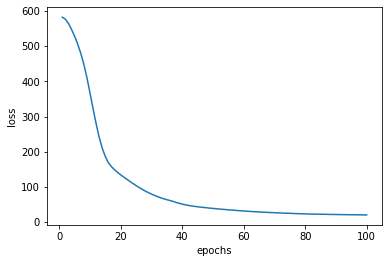

In [74]:
# using history to make a graph
history = model.history
df = pd.DataFrame(data={
    'epochs':[x + 1 for x in range(len(history['loss']))],
    'loss':history['loss'],
    'mse':history['mse'],
    'val_loss':history['val_loss'],
    'val_mse':history['val_mse'],
})

sns.lineplot(x='epochs', y='loss', data=df);

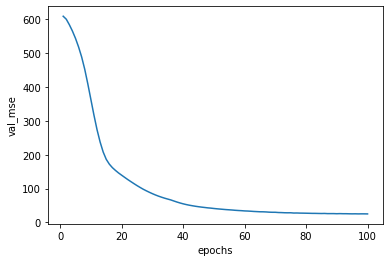

In [73]:
sns.lineplot(x='epochs', y='val_mse', data=df);

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.